In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

<h2 align="center" style="color:blue">Data Loading</h2>

In [3]:
df = pd.read_excel("premiums_young_with_gr.xlsx")

In [4]:
df.columns = df.columns.str.replace(" ","_").str.lower()

In [5]:
print("No. of Rows and Columns are : ",df.shape)

No. of Rows and Columns are :  (20096, 14)


In [6]:
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


<h2 align="center" style="color:blue">Exploratory Data Analysis</h2>

In [7]:
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [8]:
df.dropna(inplace = True)
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.drop_duplicates().sum()
df.duplicated().sum()

np.int64(0)

In [11]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267,2.503932
std,2.294052,0.940713,23.420493,2749.906347,1.710203
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


## Data Cleaning

In [12]:
df[df["number_of_dependants"]<0]["number_of_dependants"].unique()

array([-3, -1])

There are some negative values in number_of_dependants columns. We can replace them with positive numbers

In [13]:
df['number_of_dependants'] = df['number_of_dependants'].abs()
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267,2.503932
std,2.294052,0.937200,23.420493,2749.906347,1.710203
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


## Univariate Analysis : Numeric Columns

In [14]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns  

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

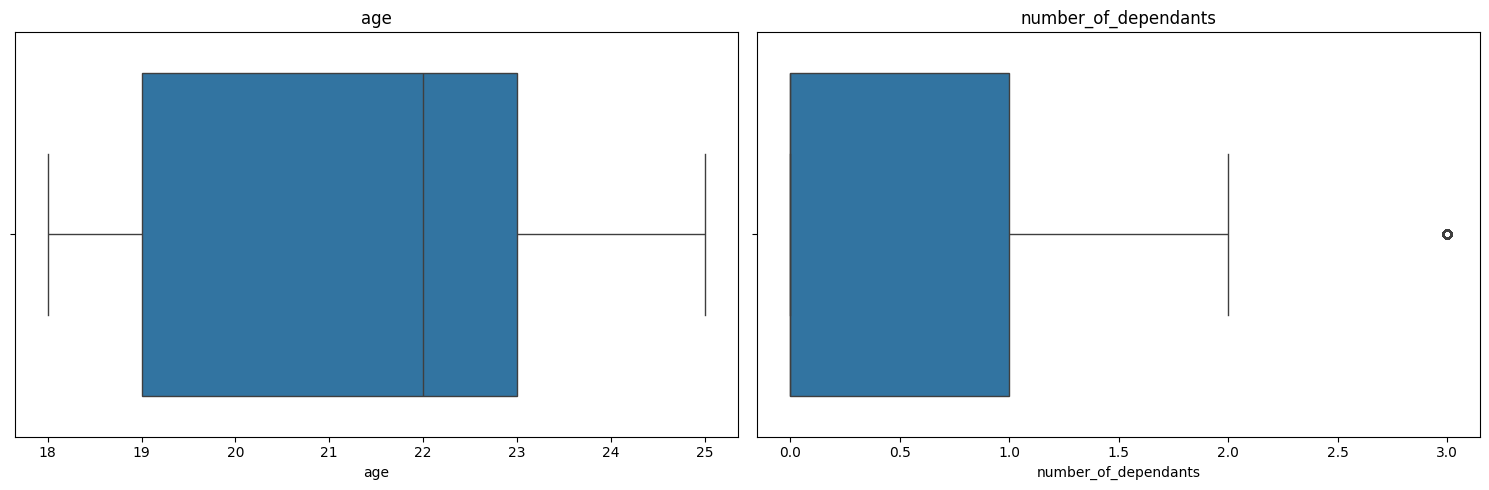

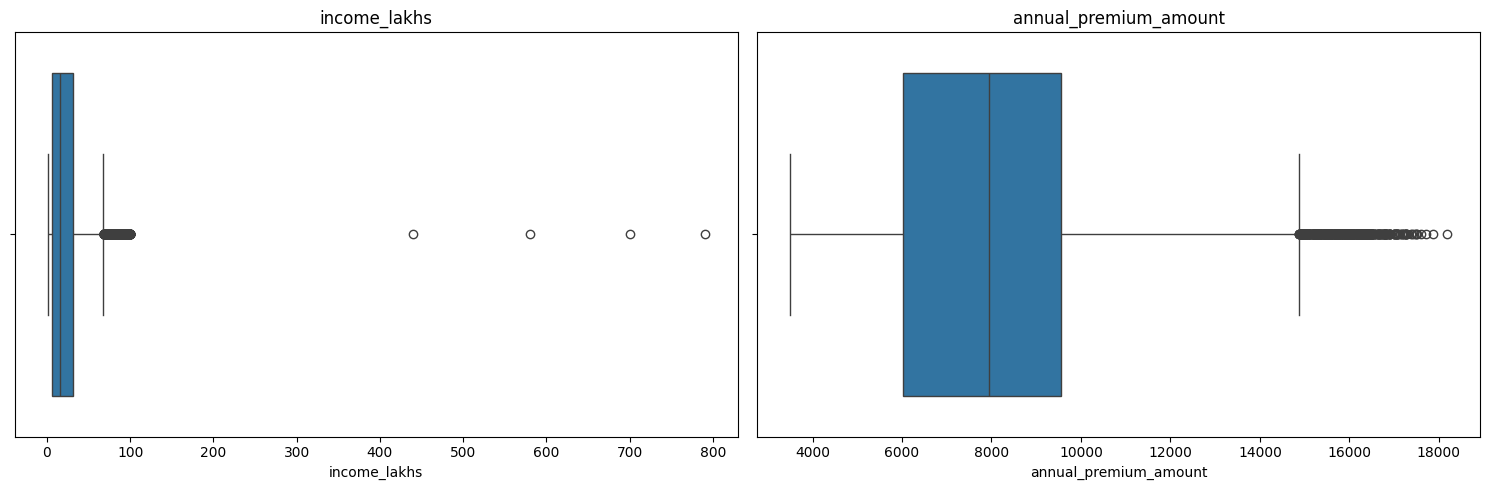

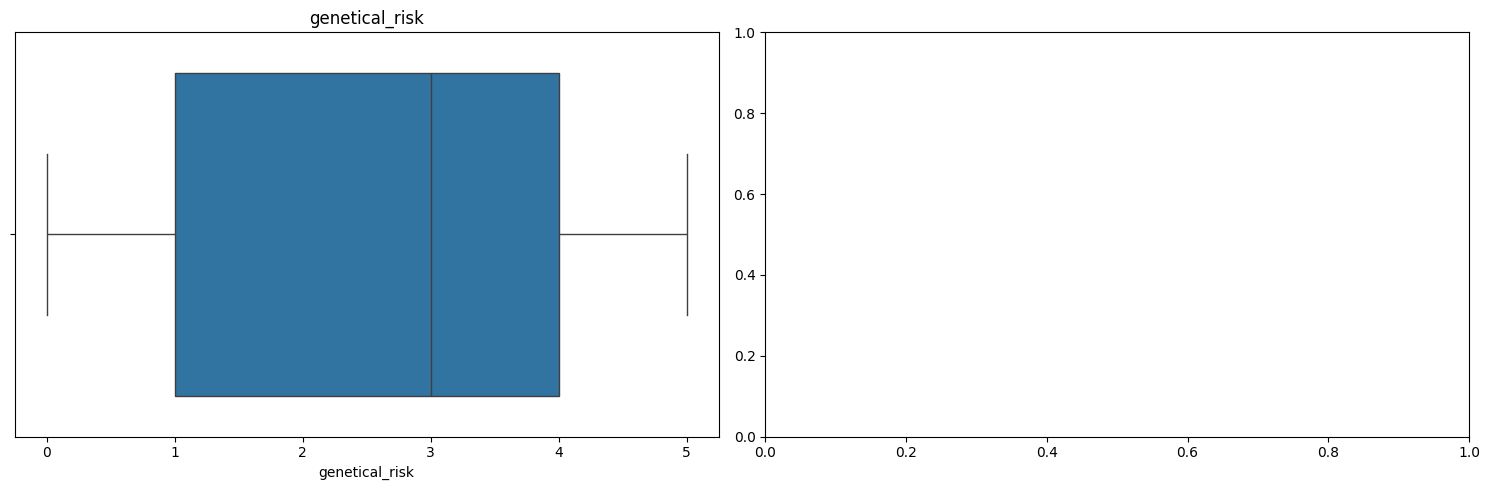

In [16]:
max_visuals = 5
visuals_count = 0

for i in range(0, len(numeric_columns), 2):
    if visuals_count >= max_visuals:
        break
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    if i < len(numeric_columns) and visuals_count < max_visuals:
        sns.boxplot(ax=axes[0], x=df[numeric_columns[i]])
        axes[0].set_title(numeric_columns[i])
        visuals_count += 1
    
    if i + 1 < len(numeric_columns) and visuals_count < max_visuals:
        sns.boxplot(ax=axes[1], x=df[numeric_columns[i + 1]])
        axes[1].set_title(numeric_columns[i + 1])
        visuals_count += 1
    
    plt.tight_layout()
    plt.show()

## Outlier Treatment : Age column

In [17]:
df[df["age"]>100]["age"].unique()

array([], dtype=int64)

In [18]:
df1 = df[df["age"]<=100]

In [19]:
df1.age.describe()

count    20090.000000
mean        21.494375
std          2.294052
min         18.000000
25%         19.000000
50%         22.000000
75%         23.000000
max         25.000000
Name: age, dtype: float64

## Outlier Treatment : Income_lakhs column

In [20]:
quantile_thresold = df1['income_lakhs'].quantile(0.999)
quantile_thresold

np.float64(100.0)

In [21]:
df1[df1.income_lakhs>quantile_thresold].shape

(4, 14)

In [22]:
df2 = df1[df1.income_lakhs<=quantile_thresold].copy()
df2.income_lakhs.describe()

count    20086.000000
mean        22.390371
std         21.732062
min          1.000000
25%          6.000000
50%         16.000000
75%         31.000000
max        100.000000
Name: income_lakhs, dtype: float64

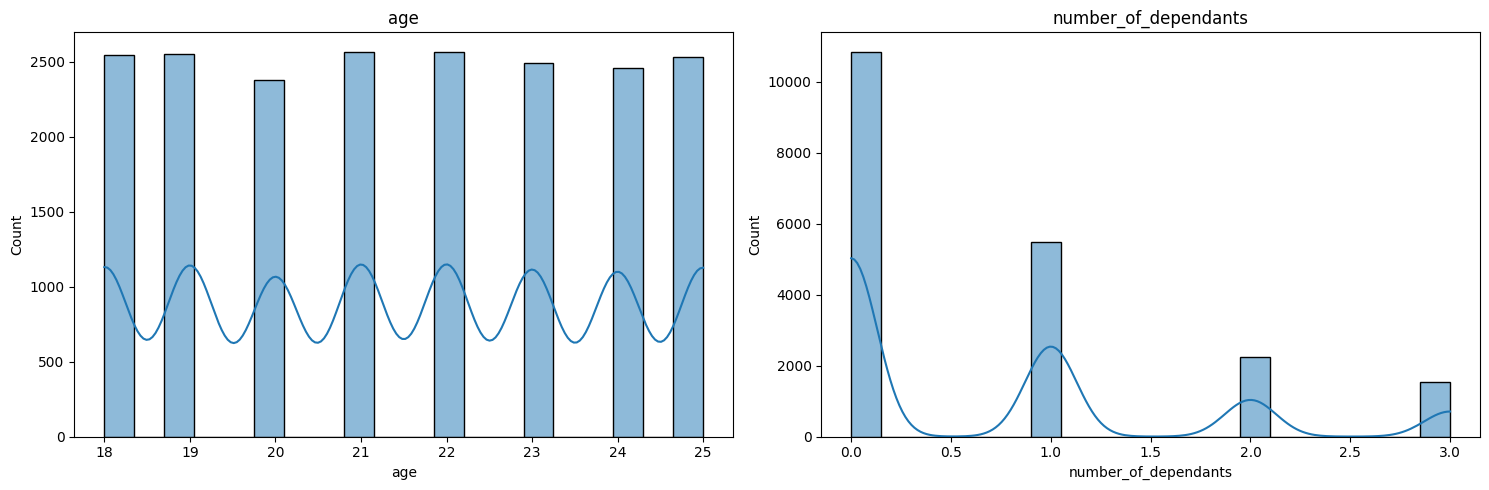

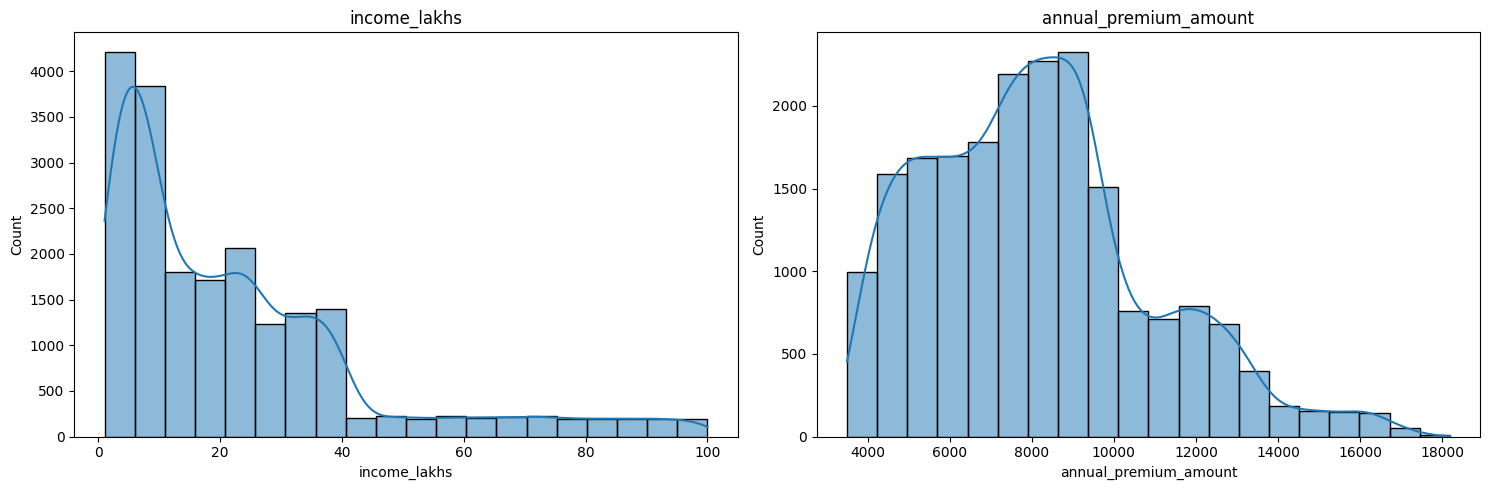

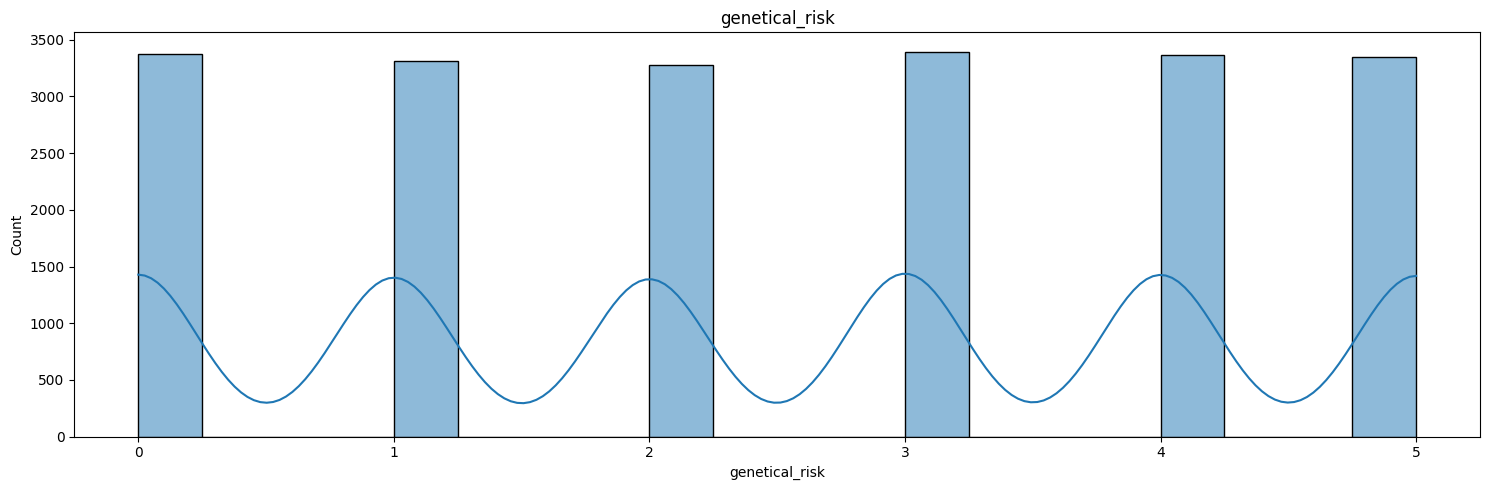

In [26]:
max_visuals = 5
visuals_count = 0

for i in range(0, len(numeric_columns), 2):
    if visuals_count >= max_visuals:
        break

    # Determine the number of plots in the current figure
    num_plots = min(2, max_visuals - visuals_count)
    
    fig, axes = plt.subplots(1, num_plots, figsize=(15, 5))
    
    if num_plots == 1:
        axes = [axes]  # Ensure axes is always a list
    
    if i < len(numeric_columns) and visuals_count < max_visuals:
        sns.histplot(df2[numeric_columns[i]], bins=20, kde=True, ax=axes[0], edgecolor='black')
        axes[0].set_title(numeric_columns[i])
        visuals_count += 1
    
    if i + 1 < len(numeric_columns) and visuals_count < max_visuals and num_plots == 2:
        sns.histplot(df2[numeric_columns[i + 1]], bins=20, kde=True, ax=axes[1], edgecolor='black')
        axes[1].set_title(numeric_columns[i + 1])
        visuals_count += 1
    
    plt.tight_layout()
    plt.show()

## Bivariate Analysis : Numeric colunms

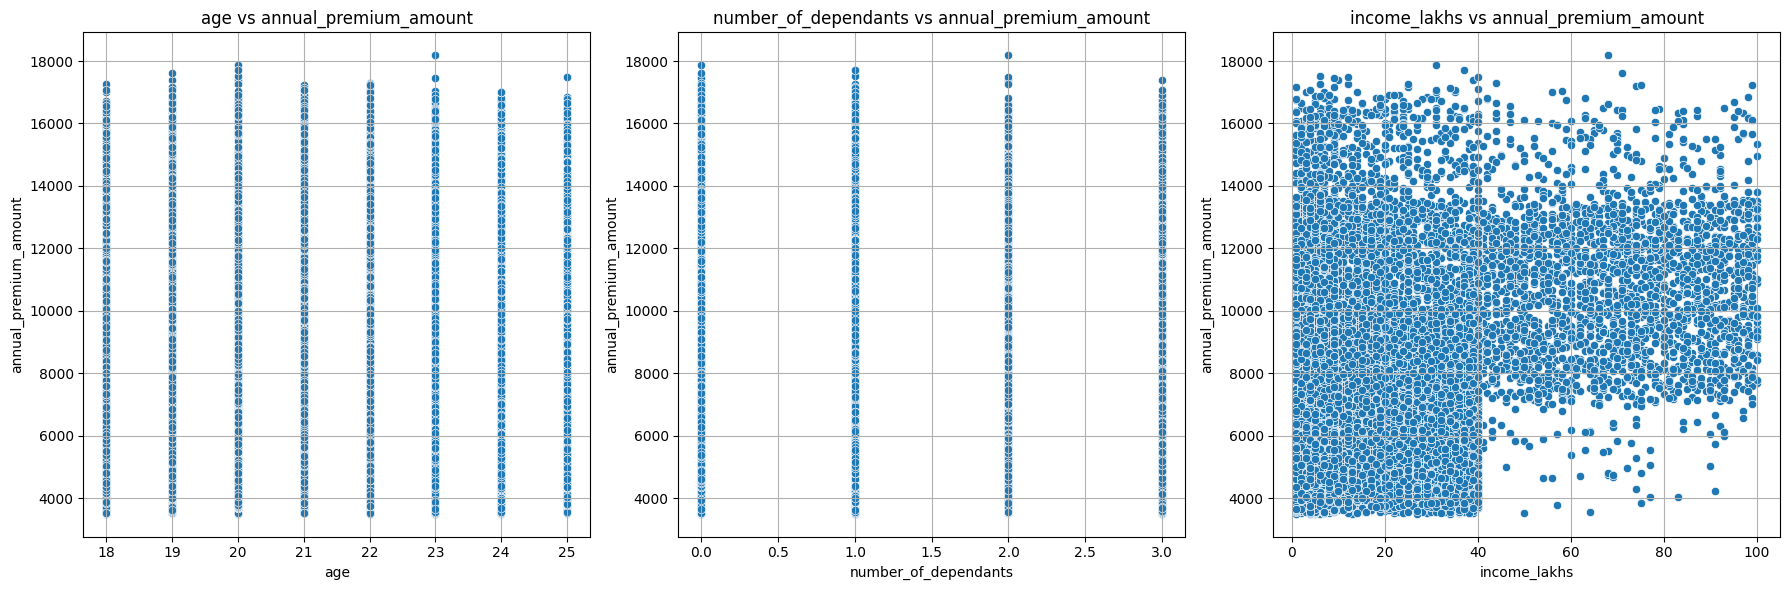

In [27]:
# Columns to plot
columns_to_plot = ['age', 'number_of_dependants', 'income_lakhs']
target_column = 'annual_premium_amount'

# Create subplots
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(18, 6))

# Loop through the columns and create scatter plots
for ax, col in zip(axes, columns_to_plot):
    sns.scatterplot(data=df2, x=col, y=target_column, ax=ax)
    ax.set_title(f'{col} vs {target_column}')
    ax.set_xlabel(col)
    ax.set_ylabel(target_column)
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

## Categorical Columns

In [28]:
categorical_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level', 'medical_history', 'insurance_plan','genetical_risk']
for col in categorical_cols:
    print(col, ":", df2[col].unique())

gender : ['Male' 'Female']
region : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status : ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
income_level : ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan : ['Silver' 'Bronze' 'Gold']
genetical_risk : [4 3 2 1 0 5]


In [29]:
df2['smoking_status'].unique()

array(['Regular', 'No Smoking', 'Occasional', 'Smoking=0',
       'Does Not Smoke', 'Not Smoking'], dtype=object)

In [30]:
df2['smoking_status'] = df2['smoking_status'].replace({
            'Smoking=0' : 'No Smoking',
            'Does Not Smoke' : 'No Smoking',
            'Not Smoking' : 'No Smoking'
})
df2['smoking_status'].unique()

array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

## Univariate Analysis

In [31]:
pct_count = df2['gender'].value_counts(normalize = True)
pct_count

gender
Male      0.550383
Female    0.449617
Name: proportion, dtype: float64

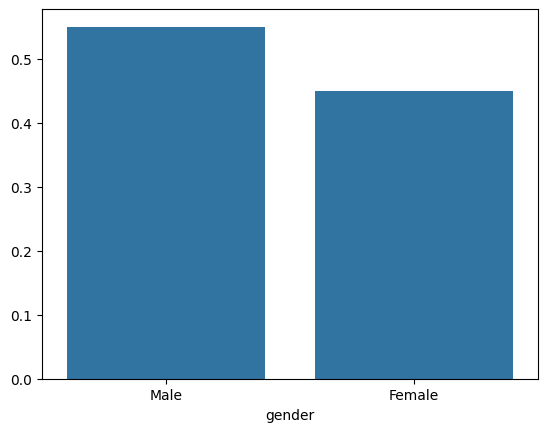

In [32]:
sns.barplot(x = pct_count.index, y = pct_count.values)
plt.show()

C:\Users\zahee\AppData\Local\Temp\ipykernel_14108\189506655.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\zahee\AppData\Local\Temp\ipykernel_14108\189506655.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\zahee\AppData\Local\Temp\ipykernel_14108\189506655.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\zahee\AppData\Local\Temp\ipykernel_14108\189506655.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xtickla

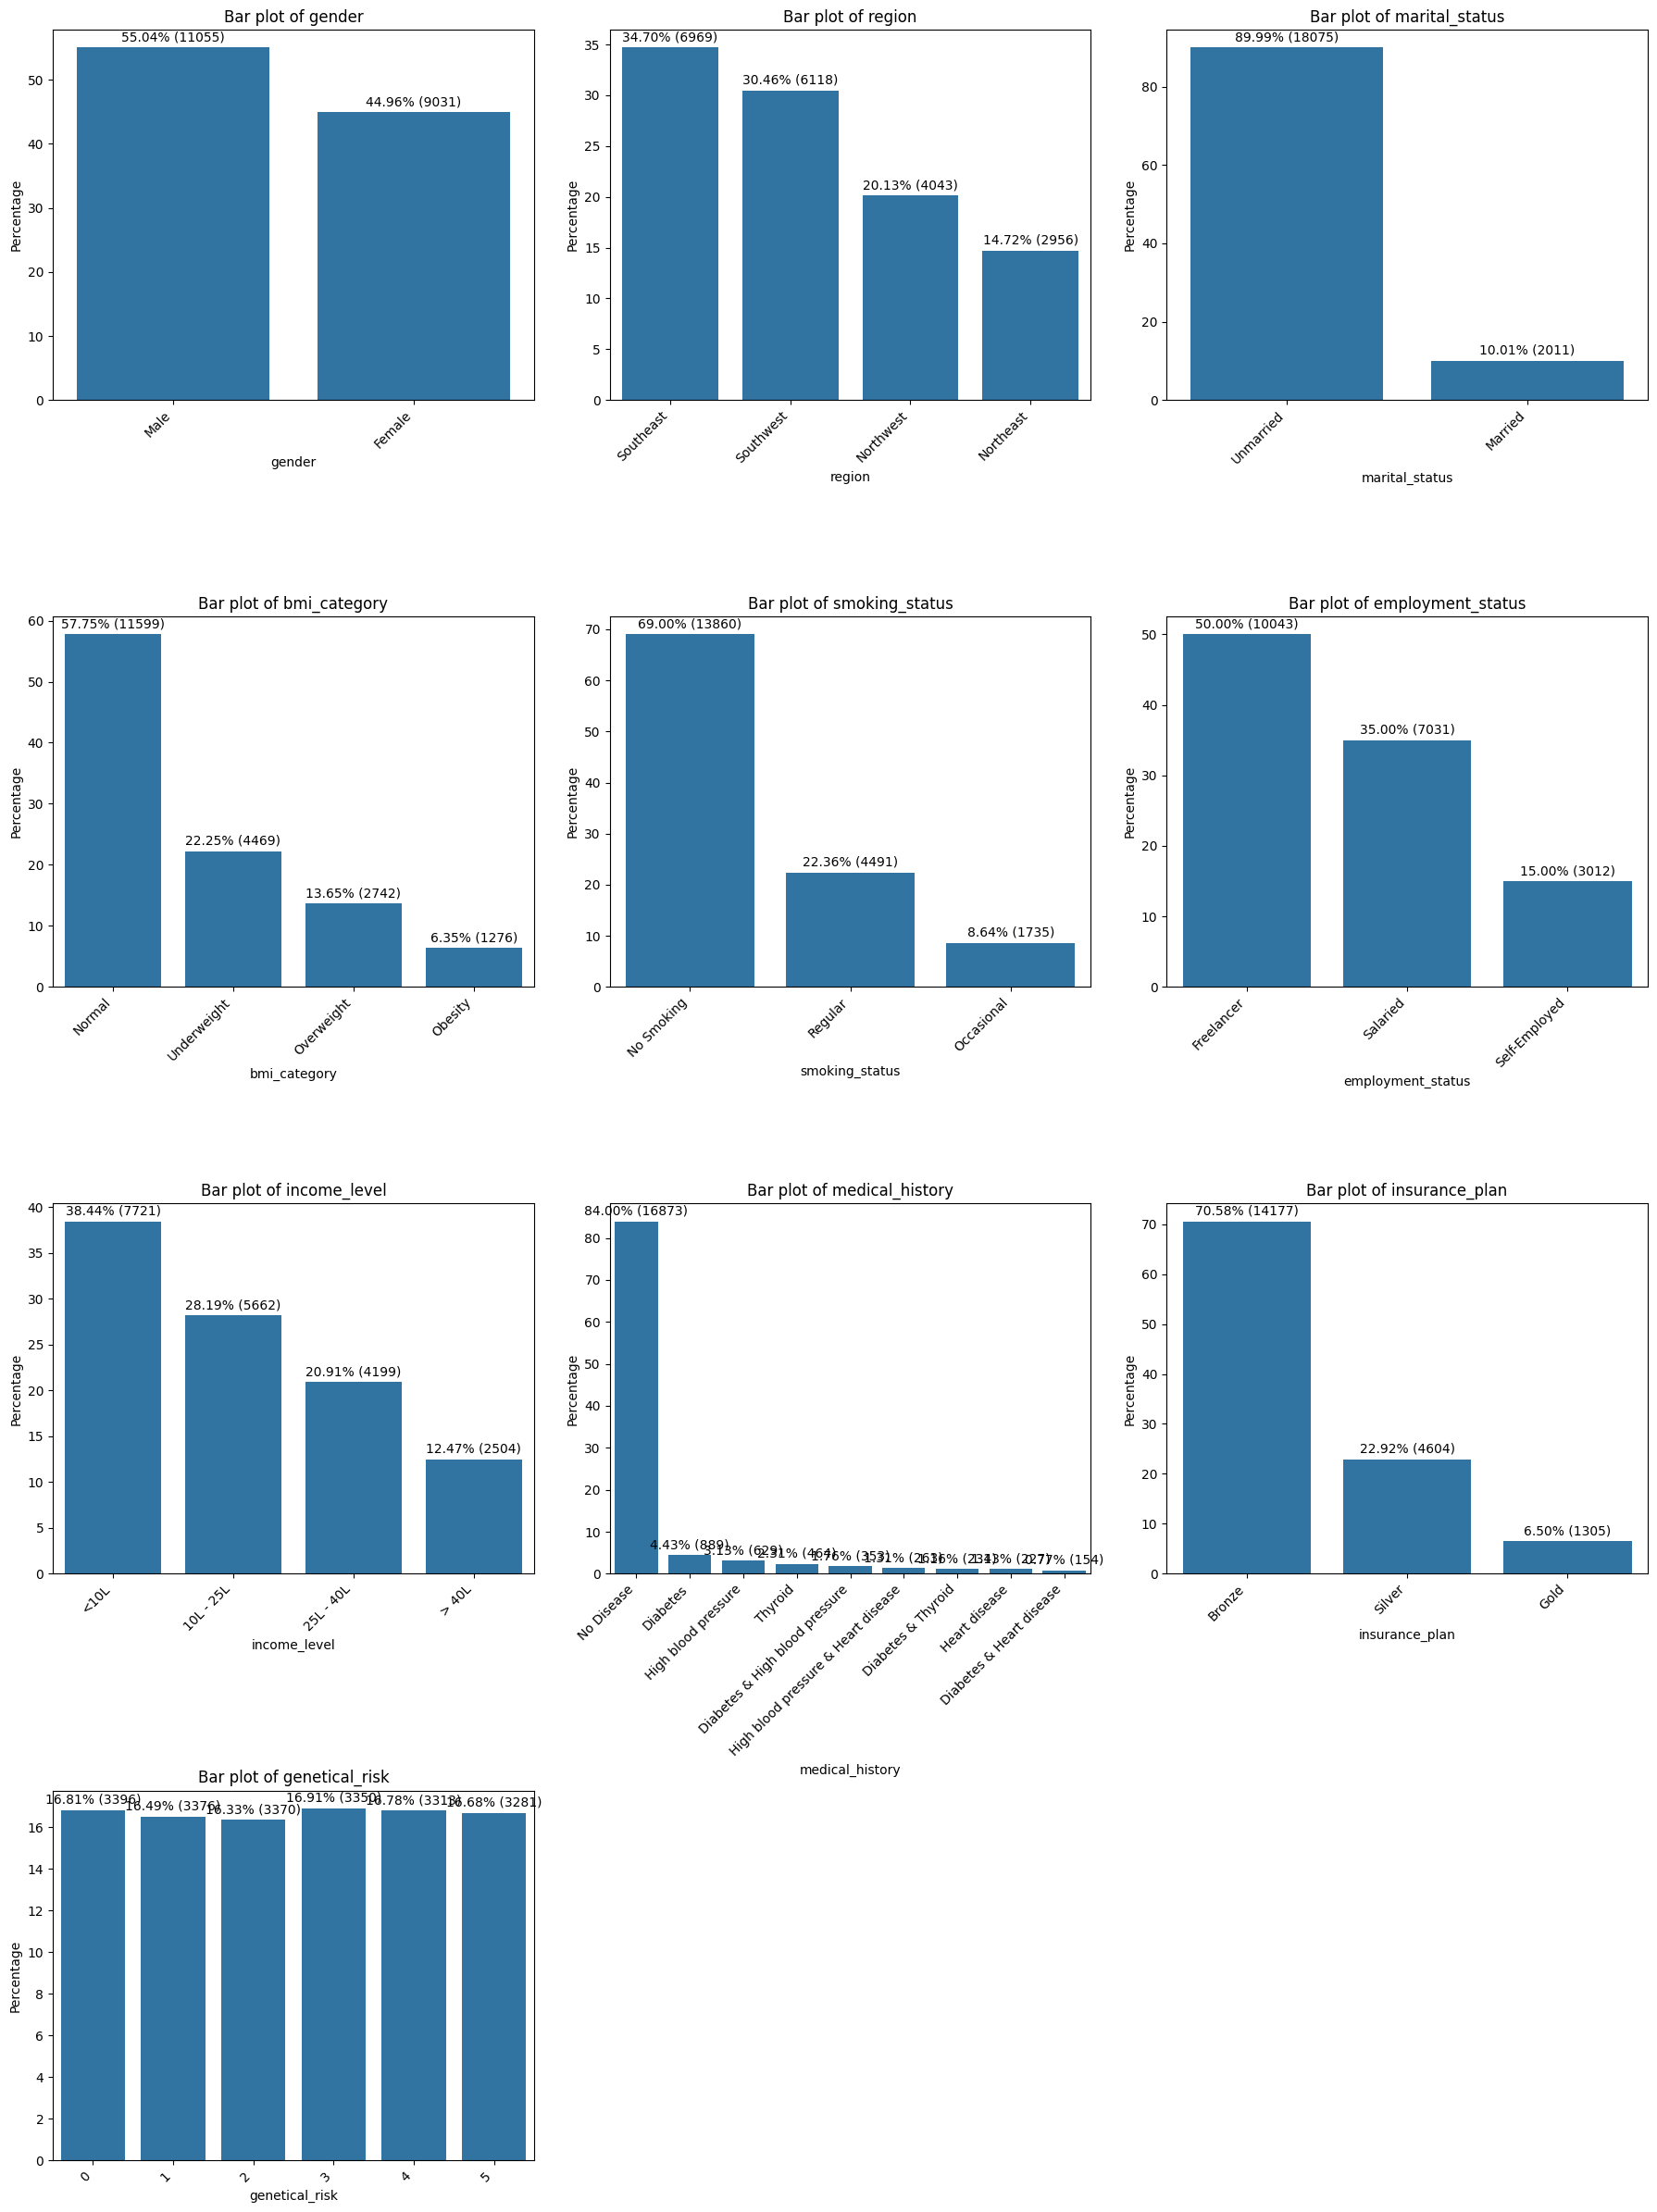

In [33]:

# Determine number of rows and columns for subplots
num_plots = len(categorical_cols)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols  # Ceiling division

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 6))
axs = axs.flatten()

# Plot each categorical column
for i, col in enumerate(categorical_cols):
    ax = axs[i]
    plot_data = df2[col].value_counts(normalize=True) * 100
    sns.barplot(x=plot_data.index, y=plot_data.values, ax=ax)
    ax.set_title(f'Bar plot of {col}')
    ax.set_ylabel('Percentage')
    ax.set_xlabel(col)

    # Add text annotations for percentage and value
    for p, val in zip(ax.patches, df2[col].value_counts()):
        percentage = f'{p.get_height():.2f}%'
        value = f' ({val})'
        ax.annotate(percentage + value, 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Remove any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

## Bivariate Analysis

In [34]:
crosstab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
crosstab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,4508,326,828
25L - 40L,3382,209,608
<10L,6172,404,1145
> 40L,115,366,2023


<Axes: xlabel='income_level'>

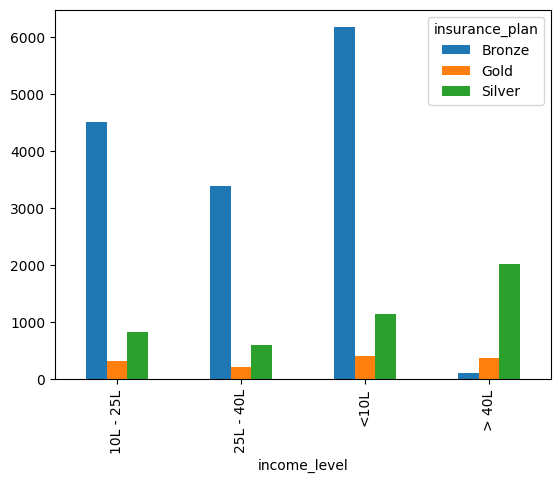

In [35]:
crosstab.plot(kind = 'bar')

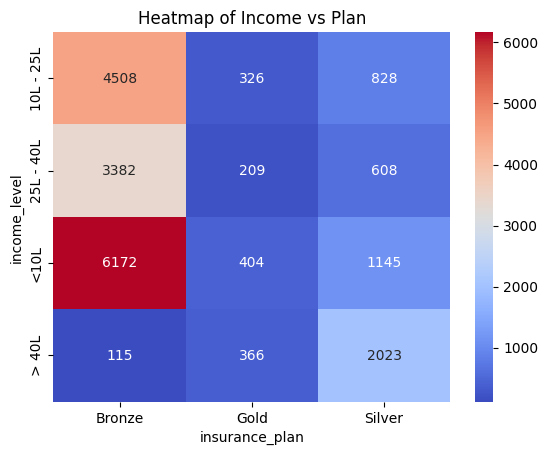

In [36]:
sns.heatmap(crosstab, annot=True, cmap='coolwarm',fmt="d")
plt.title('Heatmap of Income vs Plan')
plt.show()

<h2 align="center" style="color:blue">Feature Engineering</h2>

In [37]:
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


In [38]:
df2['medical_history'].unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

## Risk score calculation

In [39]:
# Define the risk scores for each condition
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure": 6,
    "thyroid": 5,
    "no disease": 0,
    "none": 0
}

# Split medical history into two separate columns and convert to lowercase
df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())

# Fill NaN values with 'none'
df2['disease1'] = df2['disease1'].fillna('none')
df2['disease2'] = df2['disease2'].fillna('none')

# Initialize total risk score to 0
df2['total_risk_score'] = 0

# Calculate the total risk score
for disease in ['disease1', 'disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_scores)

# Normalize the risk score to a range of 0 to 1
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)

# Display the resulting DataFrame
print(df2.head(2))

   age  gender     region marital_status  number_of_dependants bmi_category  \
0   18    Male  Northeast      Unmarried                     0   Overweight   
1   22  Female  Northwest      Unmarried                     0  Underweight   

  smoking_status employment_status income_level  income_lakhs  \
0        Regular     Self-Employed        > 40L            99   
1     No Smoking        Freelancer         <10L             3   

       medical_history insurance_plan  annual_premium_amount  genetical_risk  \
0  High blood pressure         Silver                  13365               4   
1           No Disease         Silver                  11050               3   

              disease1 disease2  total_risk_score  normalized_risk_score  
0  high blood pressure     none                 6               0.428571  
1           no disease     none                 0               0.000000  


In [40]:
df3 = df2.drop(["disease1","disease2","total_risk_score","medical_history"], axis = "columns")
df3.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,Silver,13365,4,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,Silver,11050,3,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,Silver,11857,4,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,Bronze,5684,2,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,Bronze,5712,1,0.000000


In [41]:
df3["income_level"] = df3["income_level"].map({'<10L' : 1, '10L - 25L' : 2, '> 40L' : 3, '25L - 40L' : 4 })
df3["income_level"].unique()

array([3, 1, 2, 4])

In [42]:
df3['insurance_plan'] = df3['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})
df3["insurance_plan"].unique()

array([2, 1, 3])

In [43]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df3 = pd.get_dummies(df3, columns=nominal_cols, drop_first=True, dtype=int)
df3.head(3)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,3,99,2,13365,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,3,97,2,11857,4,0.000000,0,0,1,0,1,0,0,0,0,1,1,0


In [44]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20086 entries, 0 to 20095
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              20086 non-null  int64  
 1   number_of_dependants             20086 non-null  int64  
 2   income_level                     20086 non-null  int64  
 3   income_lakhs                     20086 non-null  int64  
 4   insurance_plan                   20086 non-null  int64  
 5   annual_premium_amount            20086 non-null  int64  
 6   genetical_risk                   20086 non-null  int64  
 7   normalized_risk_score            20086 non-null  float64
 8   gender_Male                      20086 non-null  int64  
 9   region_Northwest                 20086 non-null  int64  
 10  region_Southeast                 20086 non-null  int64  
 11  region_Southwest                 20086 non-null  int64  
 12  marital_status_Unmarrie

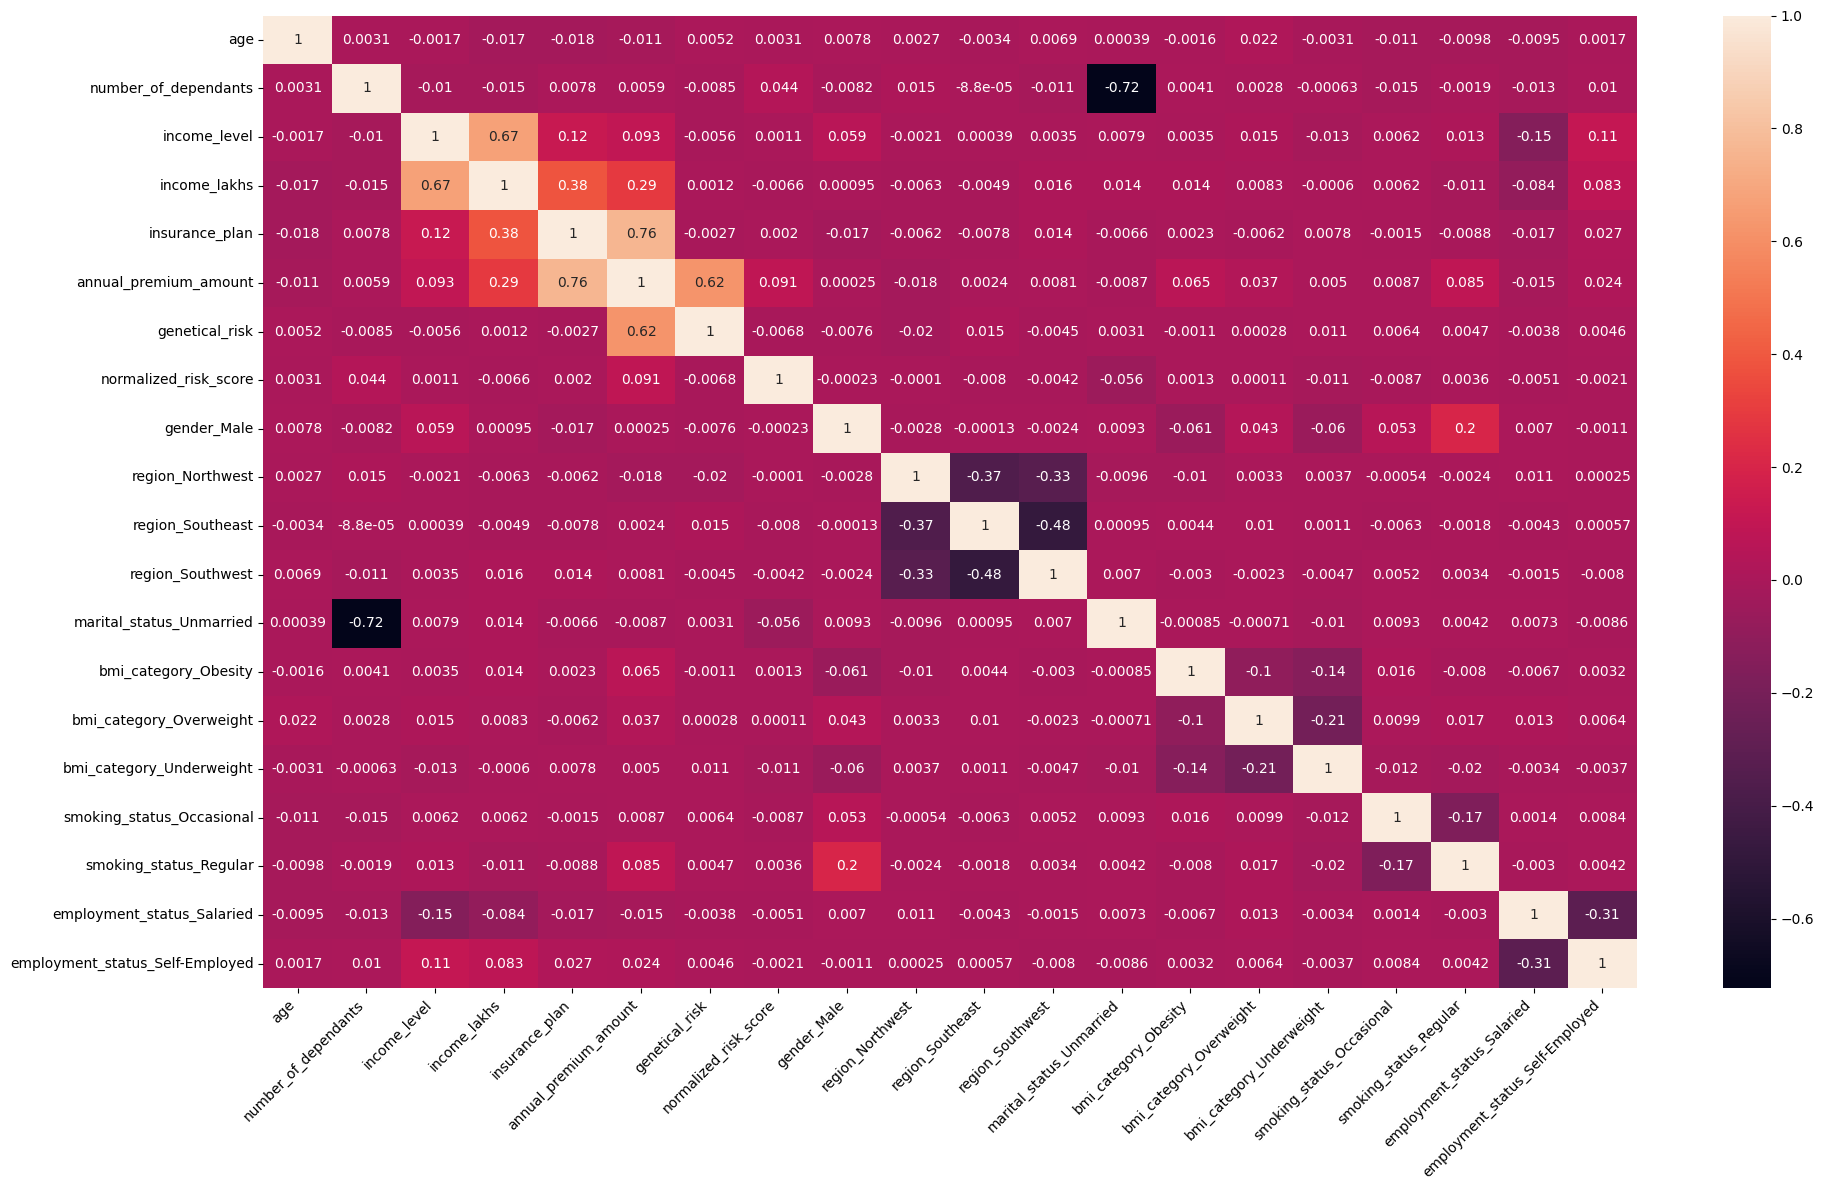

In [45]:
cm = df3.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [75]:
from sklearn.preprocessing import MinMaxScaler
X = df3.drop("annual_premium_amount", axis = 1)
y = df3["annual_premium_amount"]
cols_to_scale = ['age','number_of_dependants', 'income_level',  'income_lakhs', 'insurance_plan','genetical_risk']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()
X.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'genetical_risk', 'normalized_risk_score',
       'gender_Male', 'region_Northwest', 'region_Southeast',
       'region_Southwest', 'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

In [48]:
calculate_vif(X)

,Feature,VIF
0,age,3.155837
1,number_of_dependants,1.936584
2,income_level,3.916214
3,income_lakhs,4.344741
4,insurance_plan,1.647600
5,genetical_risk,2.981440
6,normalized_risk_score,1.154735
7,gender_Male,2.318870
8,region_Northwest,2.155017
9,region_Southeast,2.991916


<h2 align="center" style="color:blue">Model Traning</h2>

In [49]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
model_lr_train_score = model_lr.score(X_train, y_train)
model_lr_test_score = model_lr.score(X_test, y_test)
print(f'Linear Regression Train Score: {model_lr_train_score}')
print(f'Linear Regression Test Score: {model_lr_test_score}')

Linear Regression Train Score: 0.9884663066973207
Linear Regression Test Score: 0.9883148729010147


In [50]:
model_lr.intercept_

np.float64(3977.3042251034176)

In [51]:
model_lr.coef_

array([-1.48864572e+00,  2.18186053e+01, -2.19450496e+00, -1.10837851e+01,
        6.99670706e+03,  4.98494110e+03,  1.12754222e+03,  6.01261530e+00,
        4.31605285e-01, -2.73486648e+00,  5.93078478e+00,  1.50289460e+01,
        8.05264613e+02,  4.04664618e+02,  1.13671076e+02,  2.02767425e+02,
        6.07230989e+02,  3.00937059e+00,  7.04765945e+00])

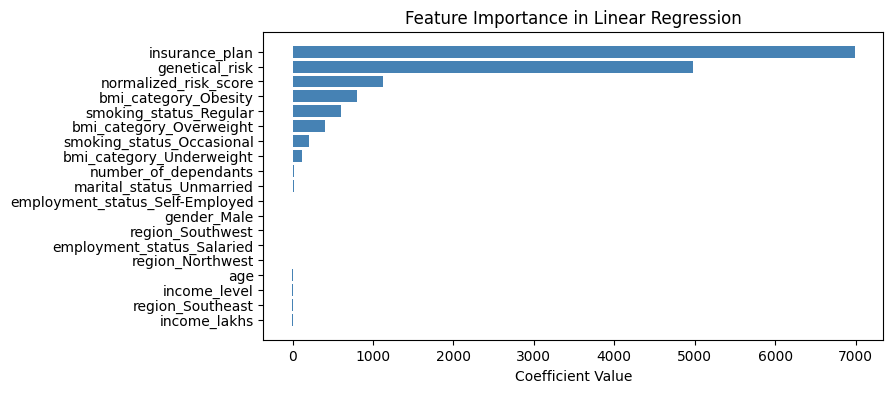

In [52]:
feature_importance = model_lr.coef_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

In [53]:
# Lasso Regression
model_la = Lasso(alpha = 0.1)
model_la.fit(X_train, y_train)
model_la_train_score = model_la.score(X_train, y_train)
model_la_test_score = model_la.score(X_test, y_test)
print(f'Lasso Regression Train Score: {model_la_train_score}')
print(f'Lasso Regression Test Score: {model_la_test_score}')

Lasso Regression Train Score: 0.9884659482683299
Lasso Regression Test Score: 0.9883179828577318


In [54]:
# Ridge Regression
model_rg = Ridge(alpha = 0.1)
model_rg.fit(X_train, y_train)
model_rg_train_score = model_rg.score(X_train, y_train)
model_rg_test_score = model_rg.score(X_test, y_test)
print(f'Ridge Regression Train Score: {model_rg_train_score}')
print(f'Ridge Regression Test Score: {model_rg_test_score}')

Ridge Regression Train Score: 0.9884663012651155
Ridge Regression Test Score: 0.9883145083265786


## Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

rf_param_distributions = {
    'n_estimators': [50, 100, 150],  # Specify a list of values instead of a range
    'max_features': ['sqrt'],        # Keep only 'sqrt' for simplicity
    'max_depth': randint(5, 15),     # Limit max_depth
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV for Random Forest
rf_random_search = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_distributions, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit Random Forest with preprocessed data
rf_random_search.fit(X_train, y_train)

# Print best parameters for Random Forest
print("Best parameters for Random Forest:")
print(rf_random_search.best_params_)
print("Best Score for Random Forest:")
print(rf_random_search.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for Random Forest:
{'max_depth': 14, 'max_features': 'sqrt', 'n_estimators': 150}
Best Score for Random Forest:
0.9686861163810576


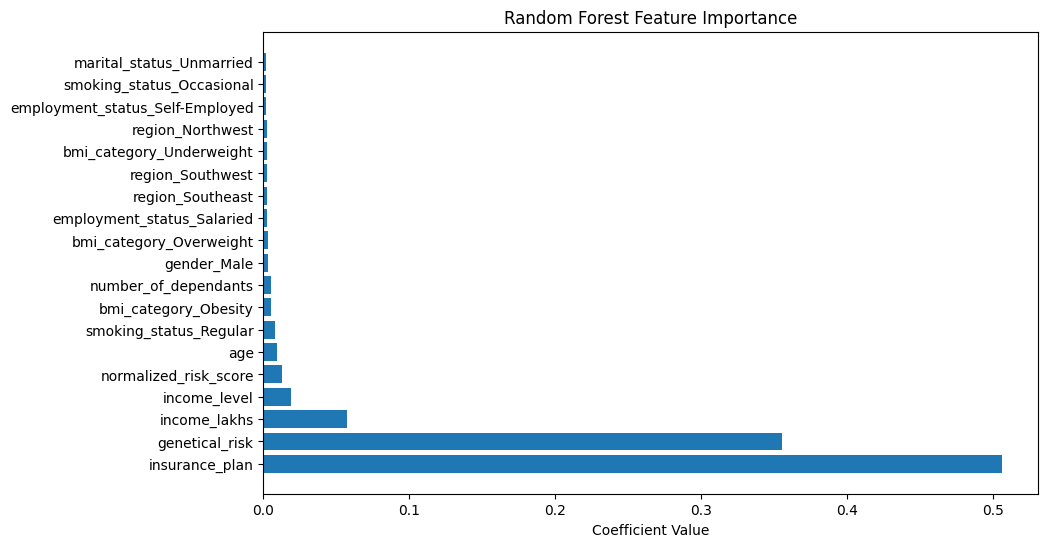

In [56]:
best_rf = rf_random_search.best_estimator_
rf_importances = best_rf.feature_importances_
rf_indices = np.argsort(rf_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importance")
plt.barh(range(X.shape[1]), rf_importances[rf_indices], align="center")
plt.yticks(range(X.shape[1]), X.columns[rf_indices])
plt.xlabel('Coefficient Value')
plt.show()


## XGBoost

In [57]:
from xgboost import XGBRegressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the simplified hyperparameter grid for XGBoost
xgb_param_distributions = {
    'n_estimators': [50, 100],         # Reduced range for n_estimators
    'max_depth': [3,5,7],              # Limit max_depth
    'learning_rate': uniform(0.01, 0.2),      # Learning rate between 0.01 and 0.2
    'subsample': uniform(0.5, 0.5),           # Subsample between 0.5 and 1
}

# Set up RandomizedSearchCV for XGBoost
xgb_random_search = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_param_distributions, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit XGBoost
xgb_random_search.fit(X_train, y_train)

# Print best parameters for XGBoost
print("Best parameters for XGBoost:")
print(xgb_random_search.best_params_)
print("Best Score for XGBoost:")
print(xgb_random_search.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters for XGBoost:
{'learning_rate': np.float64(0.14017769458977059), 'max_depth': 3, 'n_estimators': 100, 'subsample': np.float64(0.8609993861334124)}
Best Score for XGBoost:
0.9887617031733195


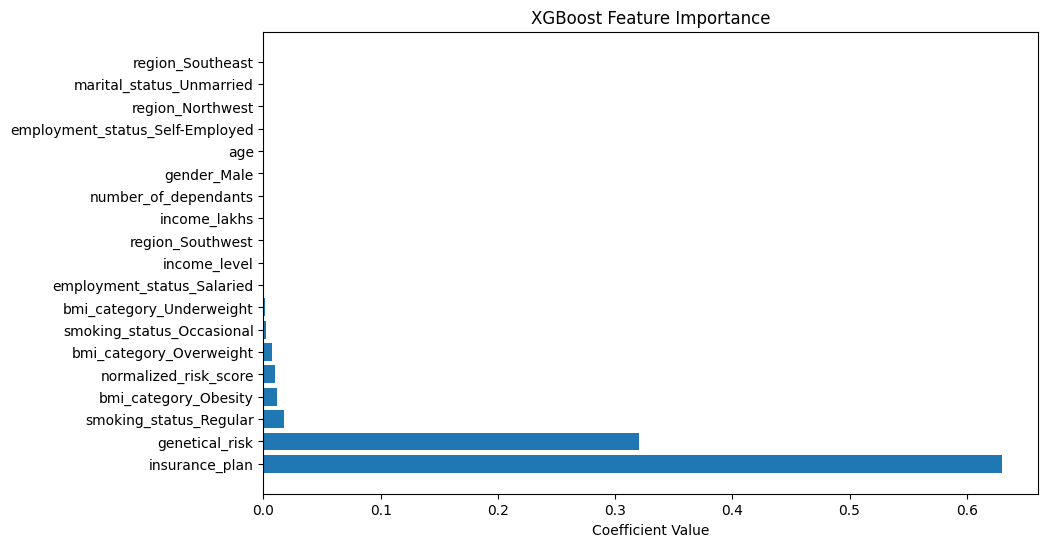

In [58]:
best_xgb = xgb_random_search.best_estimator_

# Get feature importances
importances = best_xgb.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

best_xgb = xgb_random_search.best_estimator_

xgb_importances = best_xgb.feature_importances_
xgb_indices = np.argsort(xgb_importances)[::-1]

# Feature Importance Plot for XGBoost
plt.figure(figsize=(10, 6))
plt.title("XGBoost Feature Importance")
plt.barh(range(X.shape[1]), xgb_importances[xgb_indices], align="center")
plt.yticks(range(X.shape[1]), X.columns[xgb_indices])
plt.xlabel('Coefficient Value')
plt.show()

<h2 align = "center" style = "color : blue">Error Analysis</h2>

In [59]:
y_pred = best_xgb.predict(X_test)
residuals = y_pred-y_test
residuals_pct = (residuals/y_test)*100
results_df = pd.DataFrame({
    'actual': y_test, 
    'predicted': y_pred, 
    'diff': residuals, 
    'diff_pct': residuals_pct
})
results_df.sample(5)

,actual,predicted,diff,diff_pct
13316,5255,5133.946289,-121.053711,-2.303591
14631,10899,11078.495117,179.495117,1.646895
14277,9587,9319.767578,-267.232422,-2.787446
13114,6125,6019.464844,-105.535156,-1.723023
2154,9986,9967.508789,-18.491211,-0.185171


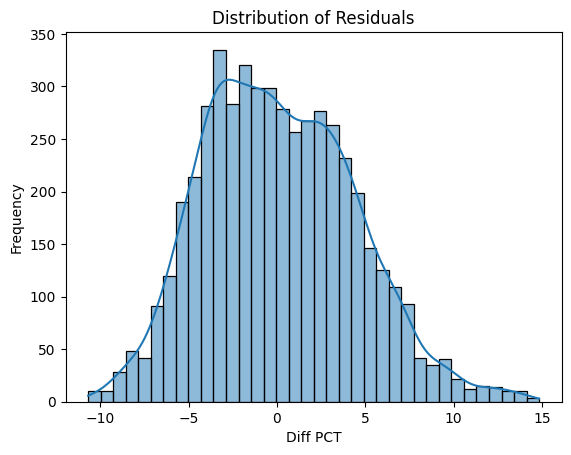

In [60]:
sns.histplot(results_df['diff_pct'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Diff PCT')
plt.ylabel('Frequency')
plt.show()

In [61]:
extreme_error_threshold = 10
extreme_result_df= results_df[np.abs(results_df['diff_pct']) > extreme_error_threshold]
extreme_result_df.shape

(93, 4)

In [62]:
extreme_error_pct = extreme_result_df.shape[0]*100/results_df.shape[0]
extreme_error_pct

1.8518518518518519

In [63]:
extreme_result_df[abs(extreme_result_df.diff_pct)>50].sort_values("diff_pct",ascending=False)

,actual,predicted,diff,diff_pct


In [64]:
extreme_errors_df = X_test.loc[extreme_result_df.index]
extreme_errors_df.head(2)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
4204,0.000000,0.0,0.333333,0.222222,0.0,0.0,0.000000,0,0,1,0,1,0,0,1,0,1,0,0
7802,0.857143,1.0,0.000000,0.020202,0.0,0.0,0.357143,1,0,1,0,0,0,0,1,0,0,0,0


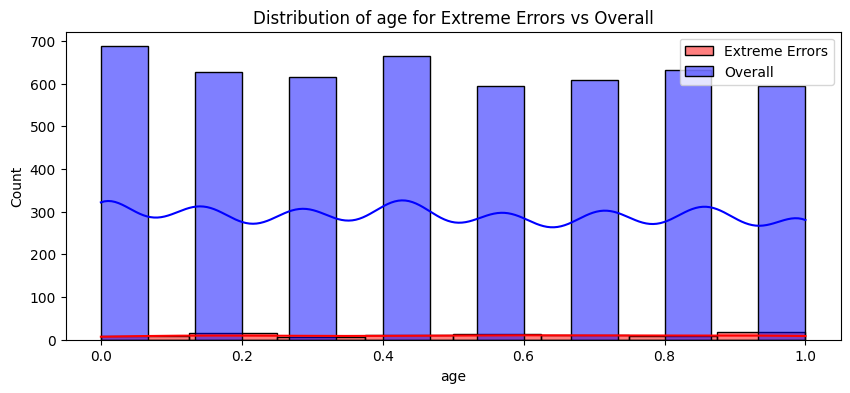

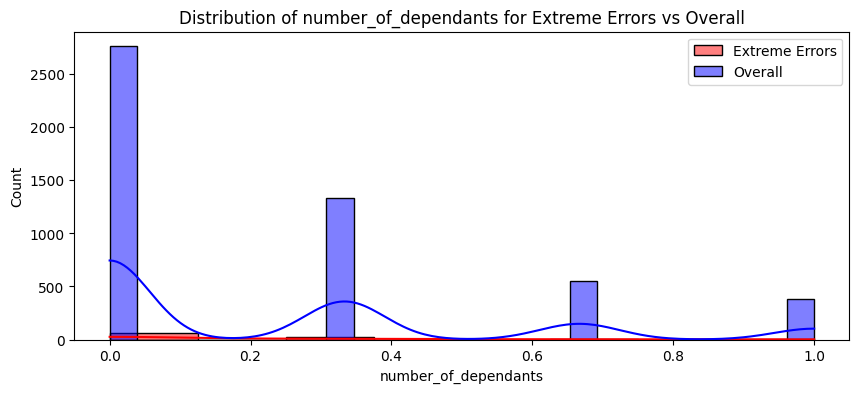

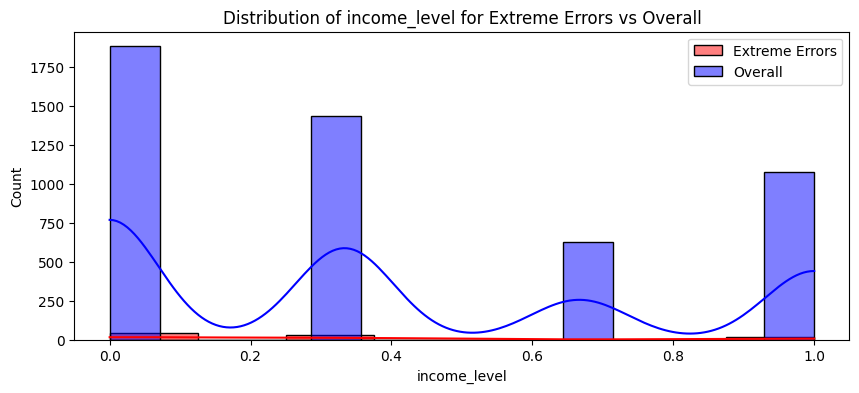

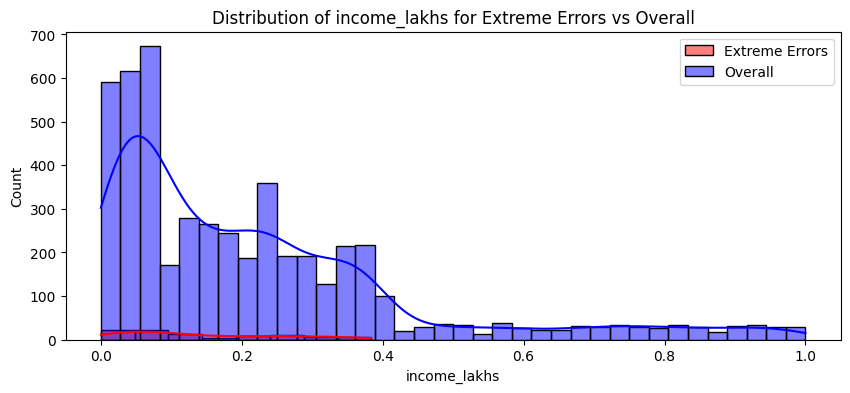

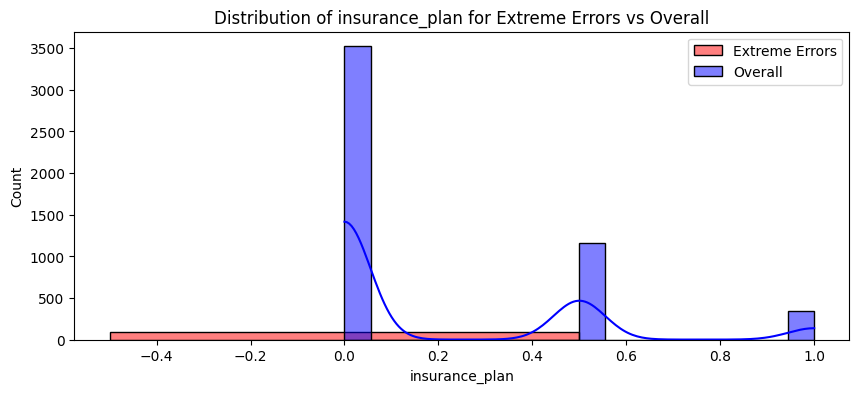

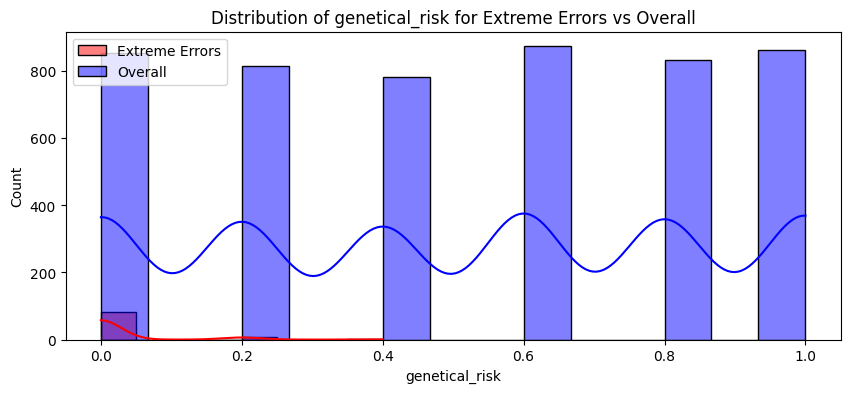

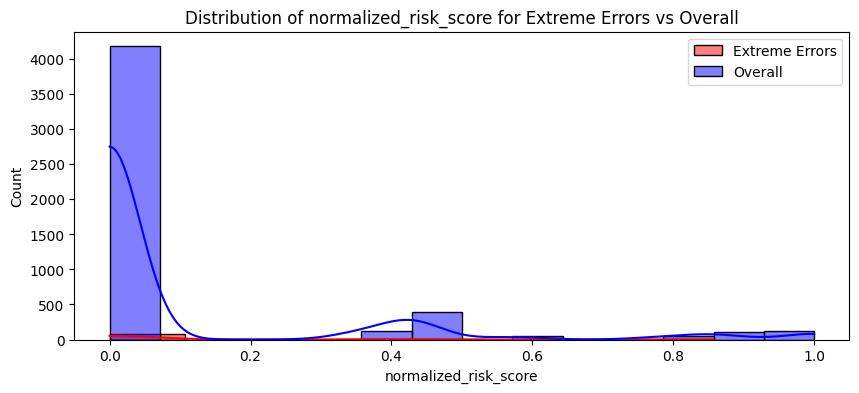

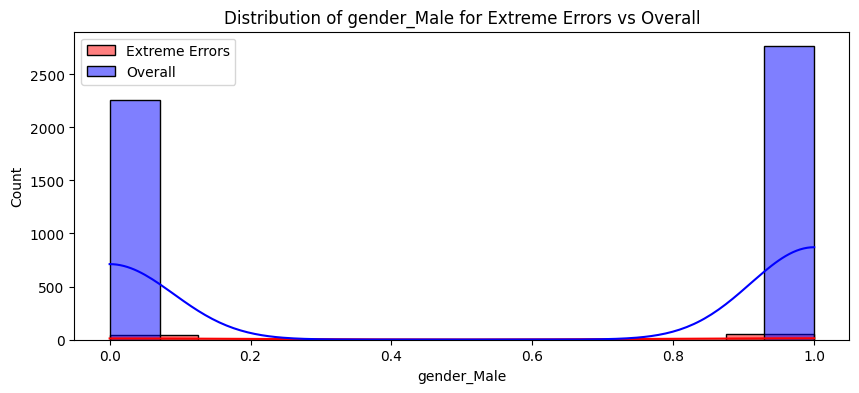

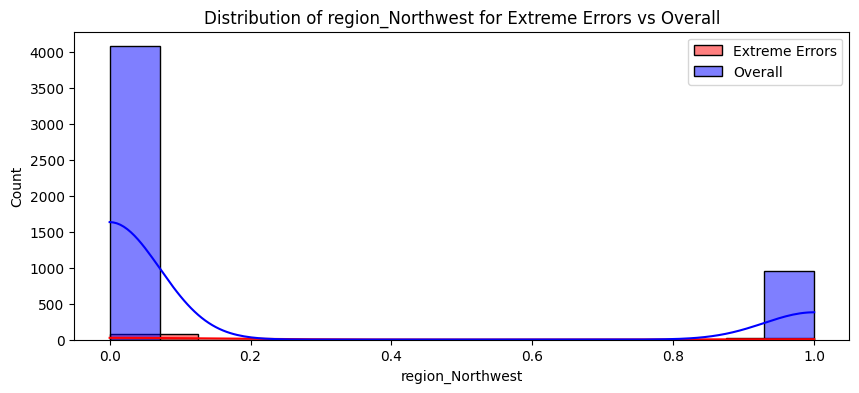

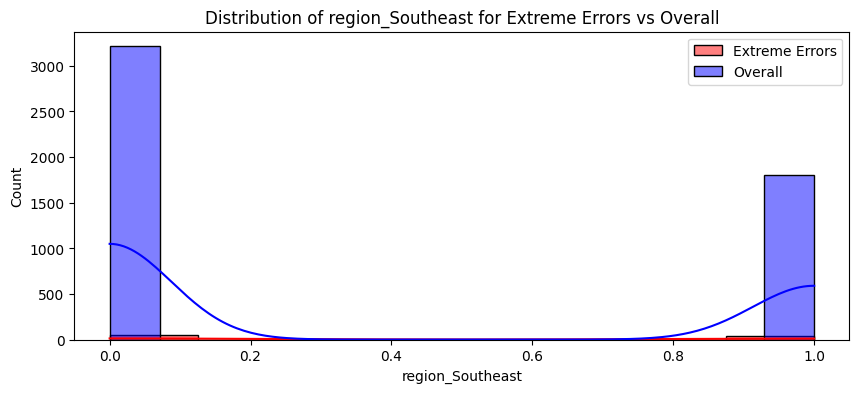

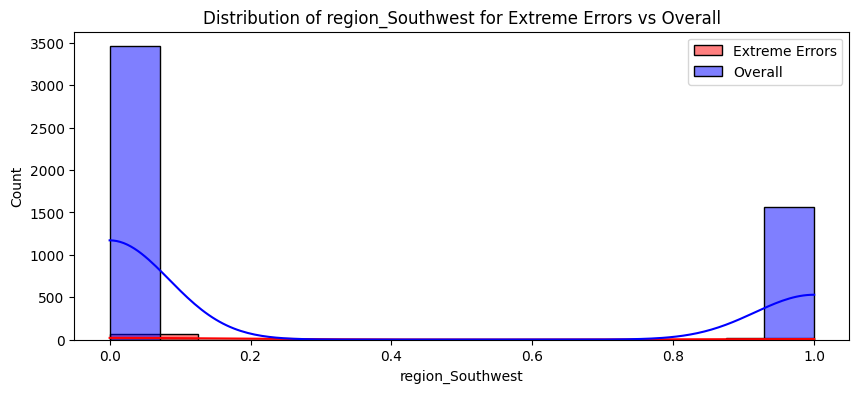

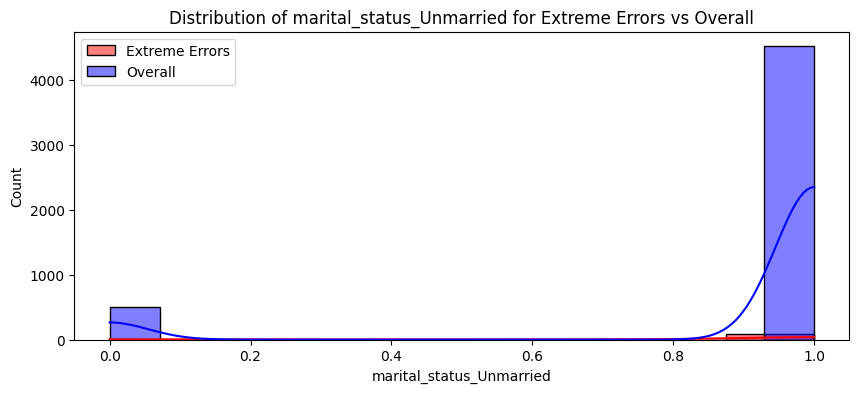

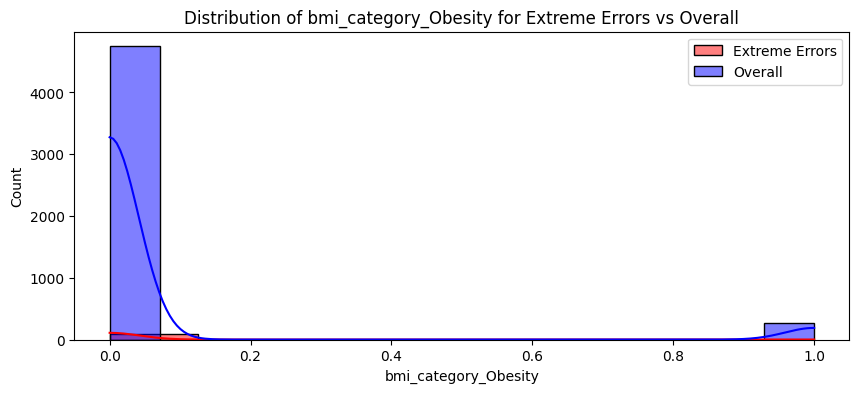

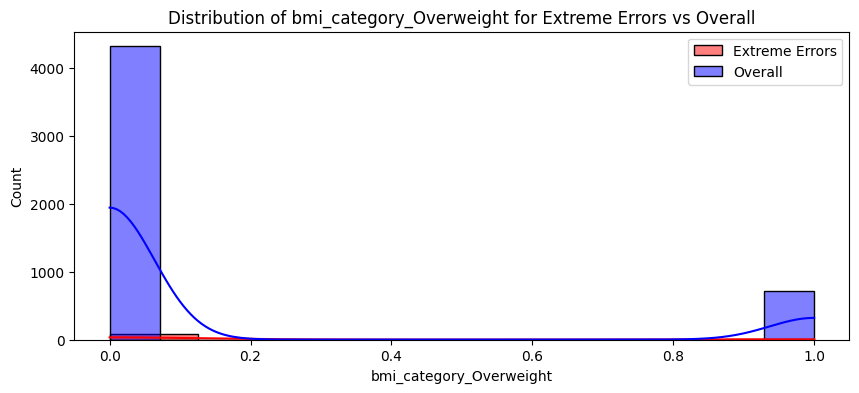

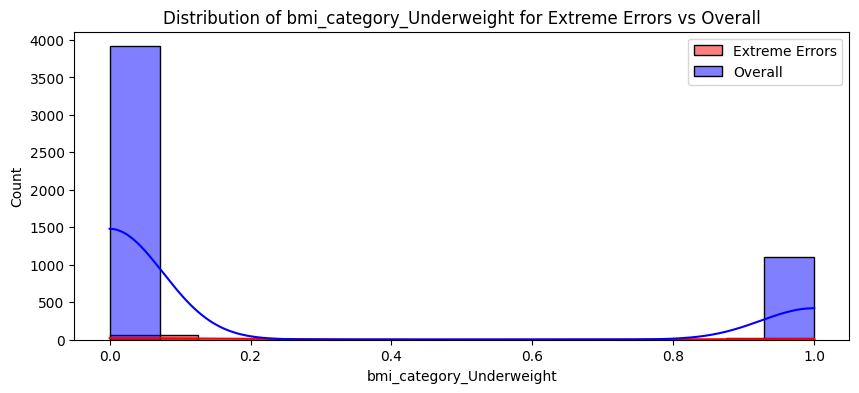

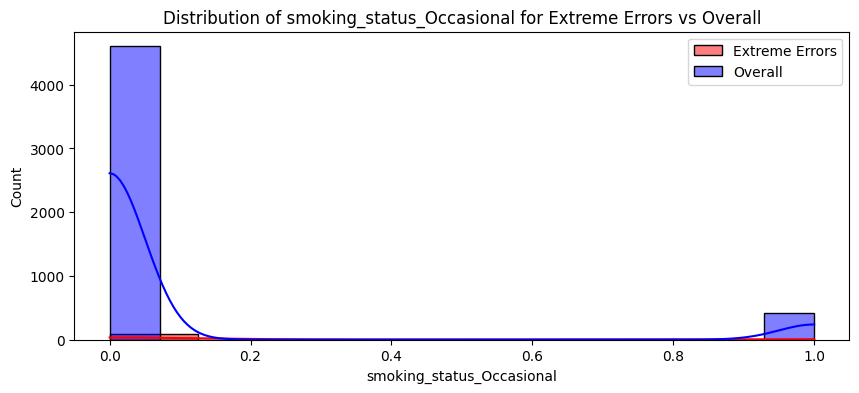

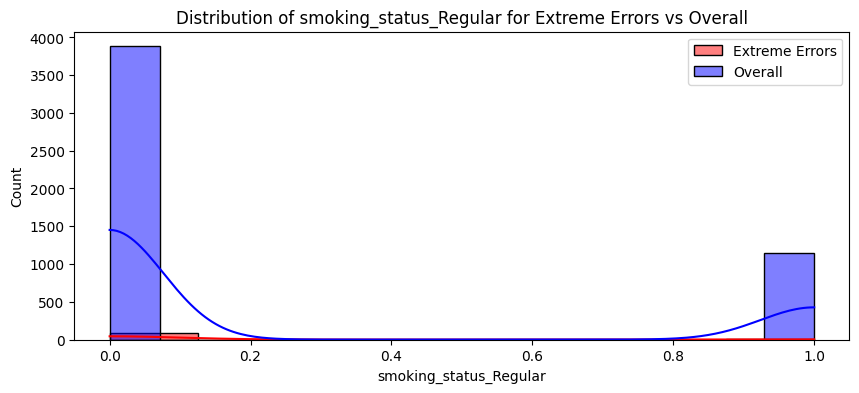

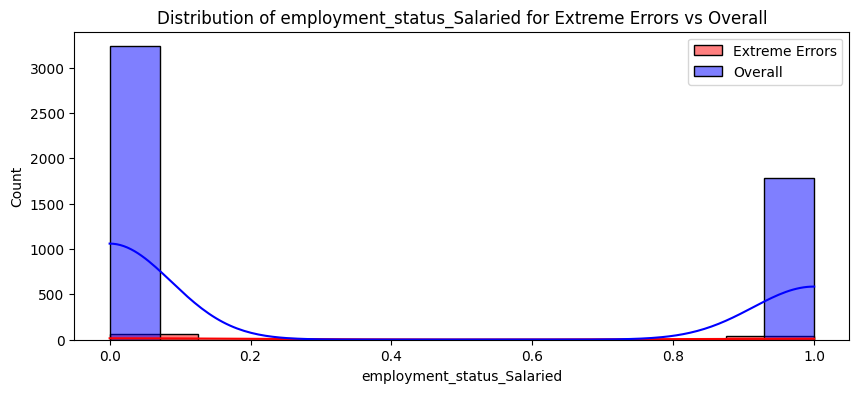

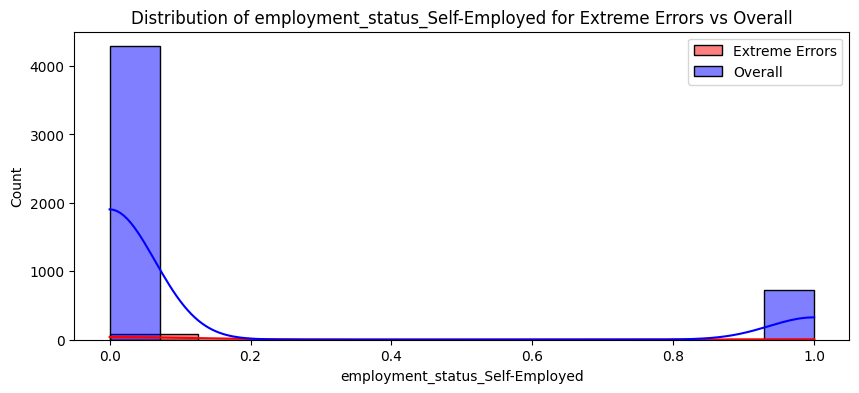

In [65]:
for feature in X_test.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(extreme_errors_df[feature], color='red', label='Extreme Errors', kde=True)
    sns.histplot(X_test[feature], color='blue', label='Overall', alpha=0.5, kde=True)
    plt.legend()
    plt.title(f'Distribution of {feature} for Extreme Errors vs Overall')
    plt.show()

In [66]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_errors_df[cols_to_scale])
df_reversed.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk
0,18.0,0.0,2.0,23.0,1.0,0.0
1,24.0,3.0,1.0,3.0,1.0,0.0
2,23.0,0.0,1.0,5.0,1.0,0.0
3,25.0,0.0,1.0,4.0,1.0,1.0
4,19.0,0.0,2.0,23.0,1.0,0.0


In [67]:
df_reversed.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk
count,93.000000,93.000000,93.000000,93.000000,93.0,93.000000
mean,21.698925,0.548387,1.935484,15.021505,1.0,0.118280
std,2.371868,0.866228,1.140237,11.223014,0.0,0.356598
min,18.000000,0.000000,1.000000,1.000000,1.0,0.000000
25%,19.000000,0.000000,1.000000,6.000000,1.0,0.000000
50%,22.000000,0.000000,2.000000,11.000000,1.0,0.000000
75%,24.000000,1.000000,2.000000,25.000000,1.0,0.000000
max,25.000000,3.000000,4.000000,39.000000,1.0,2.000000


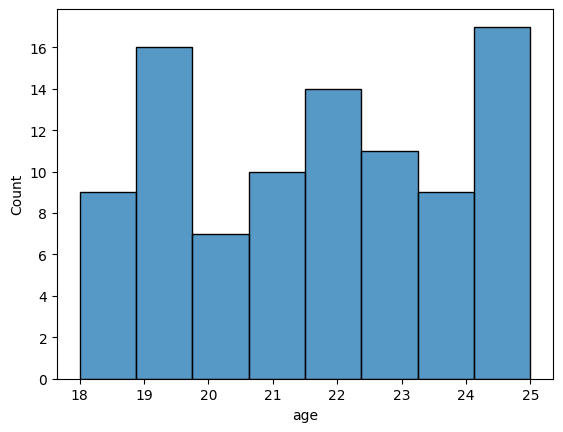

In [68]:
sns.histplot(df_reversed.age)
plt.show()

<h2 align = "center" style = "color : blue">Exporting the Model</h2>

In [69]:
from joblib import dump

In [70]:
dump(best_xgb, "Artifacts/model_young.joblib")
scaler_with_column = {
    "scaler": scaler,
    "cols_to_scale" : cols_to_scale
}
dump(scaler_with_column, "Artifacts/model_young.joblib")

['Artifacts/model_young.joblib']

{'scaler': MinMaxScaler(),
 'cols_to_scale': ['age',
  'number_of_dependants',
  'income_level',
  'income_lakhs',
  'insurance_plan',
  'genetical_risk']}